In [14]:
from sympy import *
import numpy as np
from IPython.display import display
init_printing()
%matplotlib inline
#bokeh
from bokeh.plotting import Figure, output_notebook, show
from bokeh.layouts import widgetbox, column
from bokeh.models import CustomJS, ColumnDataSource, Slider

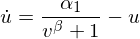

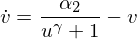

In [2]:
u, v, a1, a2, beta, gamma = symbols("u v alpha_1 alpha_2 beta gamma", positive=1)
dotu = a1/(1+v**beta) - u
du = Symbol("\dot{u}")
dotv = a2/(1+u**gamma) - v
dv = Symbol("\dot{v}")
display(Eq(du, dotu), Eq(dv, dotv))

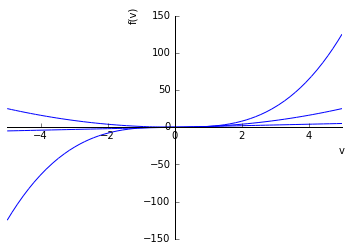

In [3]:
plot(v, v**2, v**3, (v, -5, 5))

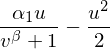

In [4]:
integrate(dotu, u)

In [15]:
output_notebook() 
x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = Figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
        var data = source.data;
        var f = cb_obj.value
        x = data['x']
        y = data['y']
        for (i = 0; i < x.length; i++) {
            y[i] = Math.pow(x[i], f)
        }
        source.trigger('change');
    """)

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power", callback=callback)

layout = column(slider, plot)

show(layout)

Loading BokehJS ...